In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
# One of the improving neural network performance is Early Stopping in the epoch
# Implementation of the Early Stopping in a network
# Author: Muhammad Humayun Khan

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import seaborn as sns

In [33]:
# creation of data from the make_circles
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

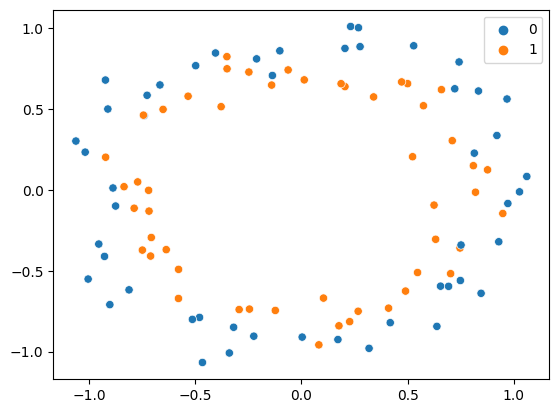

In [34]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue=y)

In [35]:
# train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [36]:
# creation of neural network 
model = Sequential()

model.add(InputLayer(shape = (2,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# using epoch value = 1000
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

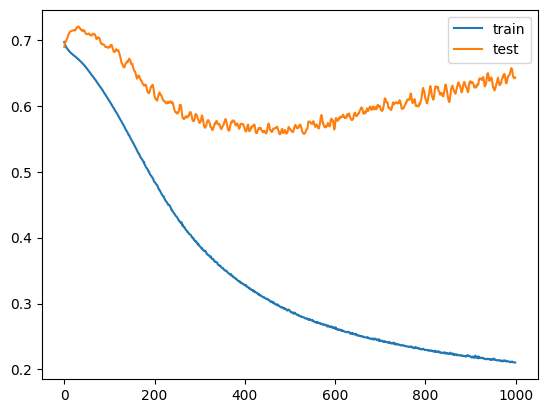

In [39]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# the graph clearly depicts that after some points the loss is increasing
# need to decrease the epoch here which is early stopping
# need to use the callback which intelligently stopped the epoch

# **Early Stopping - changing value of epoch**

In [40]:
# creation of neural network 
model = Sequential()

model.add(InputLayer(shape = (2,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
# callback to stop the earlystopping
callback = EarlyStopping(
    monitor="val_loss",     # which quantity to monitor for loss, generally it is validation loss
    min_delta=0.00001,      # what is the improvement value you want
    patience=20,            # no of epoch with no improvement, here it is 20 means wait for the 20 epoch with no improvement
    verbose=1,              # visibility of the epoch = this at the end value
    mode="auto",            
    baseline=None,
    restore_best_weights=False
)

In [43]:
# using epoch value = 1000
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)
history

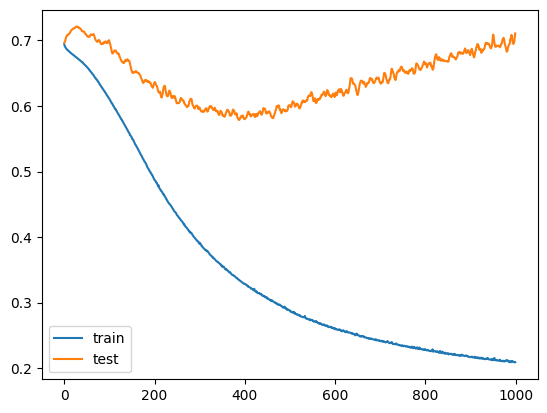

In [44]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# the clear difference in the graph is shown below where the epoch stopped 